In [1]:
import pandas
import os

%matplotlib inline
dt = pandas.read_csv(os.path.join(os.path.realpath('..'), 'detroit_response_time.csv'))
dt['Total_Trav'].describe()

count    378927.000000
mean          3.206186
std           1.393627
min           0.000085
25%           2.211618
50%           3.066299
75%           4.051381
max          15.533279
Name: Total_Trav, dtype: float64

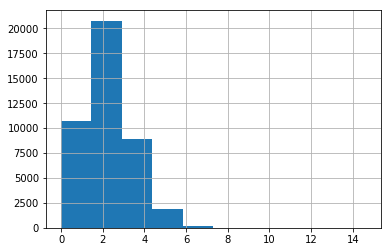

In [2]:
import pandas
%matplotlib inline
dt = pandas.read_csv(os.path.join(os.path.realpath('..'), 'arlington_response_time.csv'))
dt['Total_Trav'].hist()


In [3]:
 dt['Total_Trav'].describe()

count    42468.000000
mean         2.269506
std          1.157798
min          0.000050
25%          1.453490
50%          2.047223
75%          2.966185
max         14.610306
Name: Total_Trav, dtype: float64

(0.3381962232249362, -1.0844073333047395, 3.1682731892016429)


(array([  1.72917762e-01,   3.34876062e-01,   1.43875186e-01,
          2.97033681e-02,   2.35306117e-03,   3.86804576e-04,
          9.67011441e-05,   1.61168573e-05,   8.05842867e-05,
          1.45051716e-04]),
 array([  4.95214500e-05,   1.46107513e+00,   2.92210075e+00,
          4.38312636e+00,   5.84415197e+00,   7.30517758e+00,
          8.76620320e+00,   1.02272288e+01,   1.16882544e+01,
          1.31492800e+01,   1.46103056e+01]),
 <a list of 10 Patch objects>)

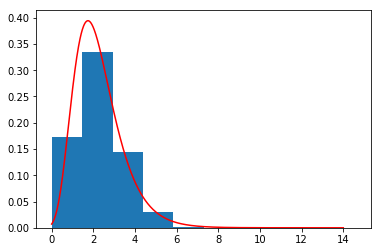

In [4]:
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt

# Use this to get the tuple shape, location, and scale.
samp = lognorm.fit(dt['Total_Trav'])
print samp
lognorm.rvs(*samp)

x = np.linspace(0, 14, 1000)
pdf_fitted = lognorm.pdf(x, samp[0], loc=samp[1], scale=samp[2])

#dt['Total_Trav'].hist(normed=True)
fig, ax = plt.subplots(1,1)

plt.plot(x, pdf_fitted, 'r-')
plt.hist(dt['Total_Trav'], normed=True)


In [5]:
class DrawType(object):
    """
    Implements a base DrawType object.
    """
    def draw(self):
        raise NotImplementedError
        

class LogNormalDraw(DrawType):
    """
    Implements a log normal draw.
    >>> import numpy as np
    >>> np.random.seed(1234)
    >>> ud = LogNormalDraw(0.3381962232249362, -1.0844073333047395, 3.1682731892016429)
    >>> ud.draw()
    2.631505249260421
    """
    def __init__(self, shape, location, scale, multiplier=1):
        self.shape = shape
        self.location = location
        self.scale = scale
        self.multiplier = multiplier

    def draw(self):
        return lognorm.rvs(self.shape, self.location, self.scale) * self.multiplier

In [6]:
lnd = LogNormalDraw(*samp)
res = []
for i in range(10000):
    res.append(lnd.draw())
    
res = np.array(res)
print res.max()
print res.mean()

10.6580819456
2.27170197156
